In [149]:
%matplotlib inline 

import requests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy.linalg as lin
import math
import csv
import warnings
import seaborn as sns

from numpy.fft import fft, ifft

In [134]:
#TempCity = open ('/Users/Mudassar/Documents/GlobalLandTemperaturesByCity.csv')
MajorCity = pd.read_csv("/Users/Mudassar/Documents/GlobalLandTemperaturesByCity.csv", index_col = 'dt', parse_dates=[0])
state_temps = pd.read_csv("/Users/Mudassar/Documents/LandTemperaturesByState.csv")

Major Cities 

In [135]:
MajorCity[MajorCity.index.year == 2013][['City', 'Country', 'AverageTemperature']].groupby(['City', 'Country']).mean().sort_values('AverageTemperature',ascending=False).head(n=15)

,,AverageTemperature
City,Country,
Jibuti,Djibouti,31.082625
Umm Durman,Sudan,30.650500
Khartoum,Sudan,30.650500
Kassala,Sudan,30.526500
Niamey,Niger,30.417125
Madras,India,30.411750
Kanchipuram,India,30.411750
Tambaram,India,30.411750
Ambattur,India,30.411750


In [136]:
MajorCity[MajorCity.index.year == 1993][['City', 'Country', 'AverageTemperature']].groupby(['City', 'Country']).mean().sort_values('AverageTemperature',ascending=False).head(n=15)

,,AverageTemperature
City,Country,
Niamey,Niger,29.643083
Umm Durman,Sudan,29.577000
Khartoum,Sudan,29.577000
Mopti,Mali,29.494333
Mossoró,Brazil,29.237917
Kassala,Sudan,29.077167
Jibuti,Djibouti,29.069250
Rabak,Sudan,29.000917
Kusti,Sudan,29.000917


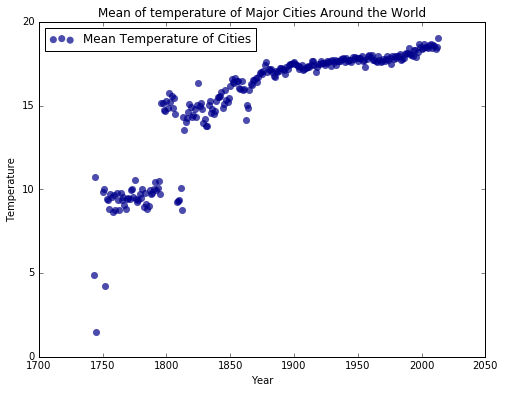

In [137]:
columns    = ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty']
newnames    = ['dt', 'at', 'atu']
majorCity = pd.read_csv("/Users/Mudassar/Documents/GlobalLandTemperaturesByCity.csv", usecols = columns, )
majorCity.columns = newnames
majorCity = majorCity[pd.notnull(majorCity['at'])]
majorCity['dt'] = majorCity['dt'].map(lambda x: int(x.split('-')[0]))
group = majorCity.groupby('dt').mean()

plt.figure(figsize = (8,6))
plt.scatter(group.index, group['at'], s=50, c='darkblue', alpha=0.7, linewidths=0, label='Mean Temperature of Cities')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Mean of temperature of Major Cities Around the World')
plt.savefig('temperature.png')

Average Temperature of Achenge, China over 300 years

In [138]:
majorCity = pd.read_csv("/Users/Mudassar/Documents/GlobalLandTemperaturesByCity.csv", parse_dates = True, infer_datetime_format = True)
majorCity['dt']= pd.to_datetime(majorCity.dt)
AchengTemp = majorCity[majorCity.City == 'Acheng'].dropna()
AchengTemp.set_index(AchengTemp.dt,inplace=True)
AchengTemp.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,,
2013-04-01,2013-04-01,3.050,0.616,Acheng,China,45.81N,128.08E
2013-05-01,2013-05-01,15.551,0.929,Acheng,China,45.81N,128.08E
2013-06-01,2013-06-01,19.908,0.551,Acheng,China,45.81N,128.08E
2013-07-01,2013-07-01,22.309,0.631,Acheng,China,45.81N,128.08E
2013-08-01,2013-08-01,20.953,0.227,Acheng,China,45.81N,128.08E


In [139]:
#ArchengYear = 
#plot=plt.plot(ArchengYear.index, pd.stats.moments.ewma(ArchengYear.AverageTemperature, com = 14.5))

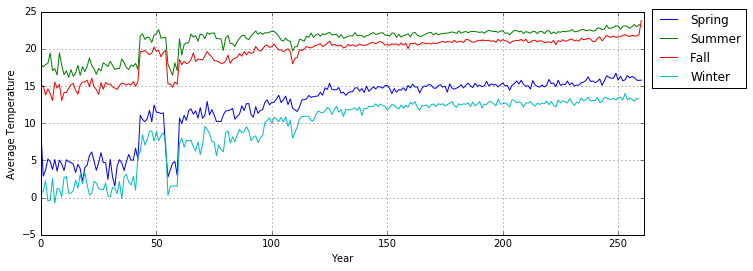

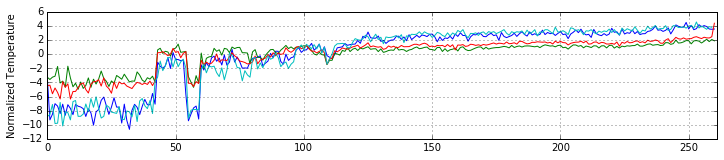

In [140]:
# Import data
global_temp = pd.read_csv("/Users/Mudassar/Documents/GlobalLandTemperaturesByCity.csv", index_col='dt', parse_dates=True)

# Fill the gaps in the series
global_temp.fillna(method='ffill')


plt.figure(figsize=(16,17))


lat = np.array(global_temp['AverageTemperature'])
det_lat = lat - np.average(lat)



seasonal_lat = np.array(seasonal_temp['AverageTemperature'])

spring = seasonal_lat[::4]
summer = seasonal_lat[1::4]
fall = seasonal_lat[2::4]
winter = seasonal_lat[3::4]


plt.figure(figsize=(12,4))
ax = plt.subplot(1,1,1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

plt.plot(spring, label='Spring')
plt.plot(summer, label='Summer')
plt.plot(fall, label='Fall')
plt.plot(winter, label='Winter')

plt.xlim([0, len(summer)])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Temperature')

plt.legend(bbox_to_anchor=(1.18, 1.04))

seasons = [spring, summer, fall, winter]
seasons_string = ['spring', 'summer', 'fall', 'winter']
seasons_average = [np.average(season) for season in seasons]
seasons_det = [seasons[i] - seasons_average[i] for i in range(len(seasons))]

plt.figure(figsize=[12,5])
plt.subplot(2,1,1)
[plt.plot(seasons_det[i], label=seasons_string[i]) for i in range(len(seasons))]
plt.ylabel('Normalized Temperature')
plt.grid()
plt.xlim([0, len(seasons_det[0])])

seasons_fft = [fft(season) for season in seasons_det]
seasons_ps = [np.abs(season)**2 for season in seasons_fft]

State Temperatures 

In [141]:
states = state_temps['State'].unique()

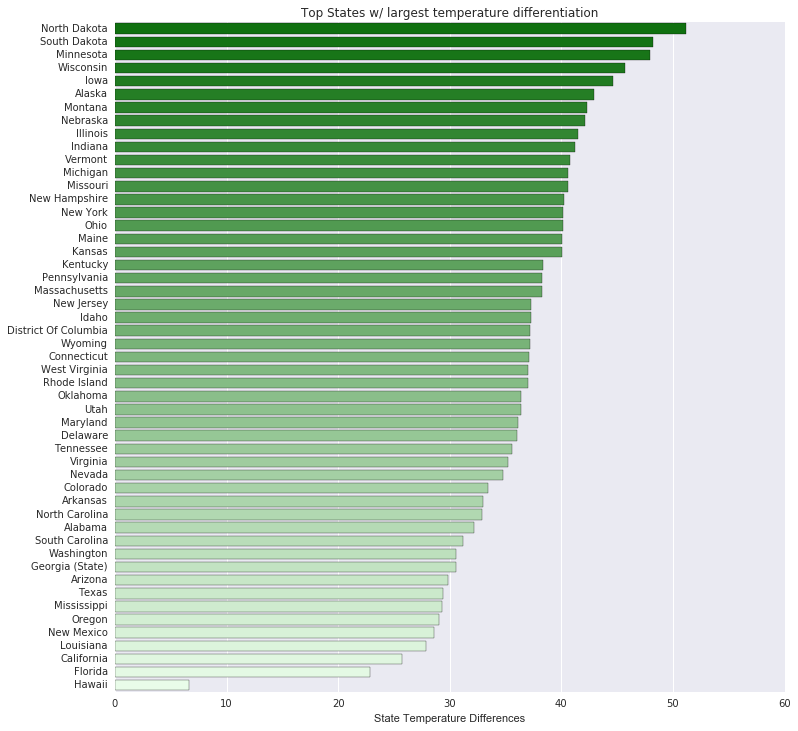

In [235]:
state_temps = pd.read_csv("/Users/Mudassar/Documents/UnitedStatesTemperatures.csv")
states = state_temps['State'].unique()

difference_list = []

for state in states:
    time_temps = state_temps[state_temps['State']==state]['AverageTemperature']
    difference_list.append((time_temps.max(), time_temps.min()))

clean_difference_list = []
clean_states = []


for i in range(len(difference_list)):
    if not np.isnan(difference_list[i][0]):
        clean_difference_list.append(difference_list[i])
        clean_states.append(states[i])
        
differences = []

for tpl in clean_difference_list:
    differences.append(tpl[0]-tpl[1])

differences, clean_states = (list(x) for x in zip(*sorted(zip(differences, clean_states), key= lambda pair: pair[0], reverse = True)))

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
f, ax = plt.subplots(figsize=(12,12))
sns.barplot(x=differences[:51], y=clean_states[:51], palette=sns.light_palette("green", 51, reverse=True), ax=ax)

texts= ax.set(ylabel="", xlabel="State Temperature Differences", title ="Top States w/ largest temperature differentiation")
